What is a Convolutional Neural Network?

1. https://youtu.be/pj9-rr1wDhM
2. KERNEL CONVOLUTION: https://youtu.be/C_zFhWdM4ic
3. EDGE DETECTION: https://youtu.be/uihBwtPIBxM?list=PLzH6n4zXuckoRdljSlM2k35BufTYXNNeF
4. CNN: https://youtu.be/py5byOOHZM8

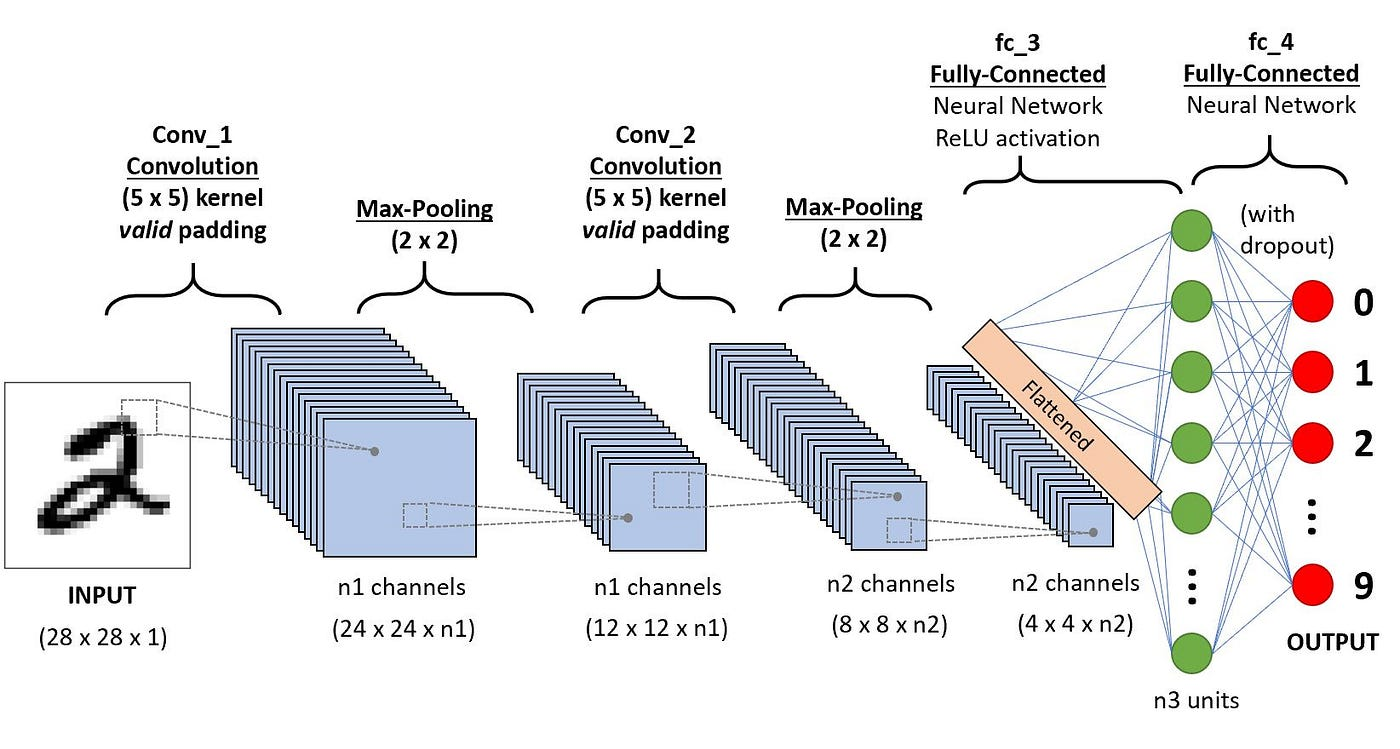

### 0. Computer Vision Libraries in PyTorch

- `torchvision` : base domain library for PyTorch Computer Vision
- `torchvision.datasets` : get datasets and data loading functions for computer vision
- `torchvision.models` : get pretrained computer vision models that you can leverage for your own problems
- `torchvision.transforms` : functions for manipulating your vision data (images) to be suitable for use with an ML model.
- `torch.utils.data.Dataset` : Base dataset class for PyTorch
- `torch.utils.data.DataLoader` : Creates a Python iterable over a dataset

In [199]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


### 1. Getting a dataset
The dataset we shall be using is Fashion-MNIST

- Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

> `0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot`

In [200]:
from torchvision import datasets

train_data = torchvision.datasets.FashionMNIST(
    root = "data", # Where to download the data?
    train = True,  # Do we want the training dataset? True - YES, False - Test Dataset
    transform = torchvision.transforms.ToTensor(), # How do we want to transform the data?
    target_transform = None, # How do we want to transform the labels/targets?
    download = True # Do you want to download? Y/N
    )

test_data = torchvision.datasets.FashionMNIST(
    root = "data", # Where to download the data?
    train = False,  # Do we want the training dataset? True - YES, False - Test Dataset
    transform = ToTensor(), # How do we want to transform the data?
    target_transform = None, # How do we want to transform the labels/targets?
    download = True # Do you want to download? Y/N
    )

In [201]:
len(train_data)

60000

In [202]:
len(test_data)

10000

In [203]:
image, label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [204]:
label

9

`torchvision.transforms.ToTensor` : Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a `torch.FloatTensor` of shape (C x H x W) in the range [0.0, 1.0]

In [205]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [206]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [207]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [208]:
image.shape  # Color_Channel * Height * Width : Grayscale have only 1 color channel

torch.Size([1, 28, 28])

#### 1.1 Visualise the data

Image shape : torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

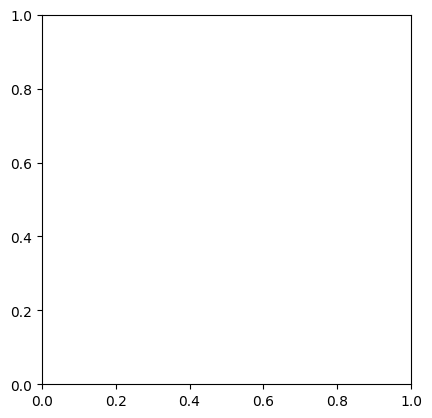

In [209]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image)

Image shape : torch.Size([1, 28, 28])


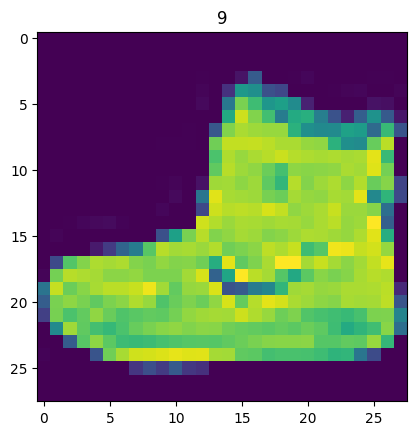

In [210]:
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze()); # Matplotlib expects color channel to be at the end, but for this grayscale, let's remove the color channel
plt.title(label);

(-0.5, 27.5, 27.5, -0.5)

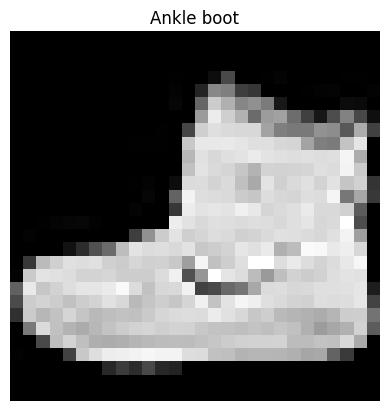

In [211]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

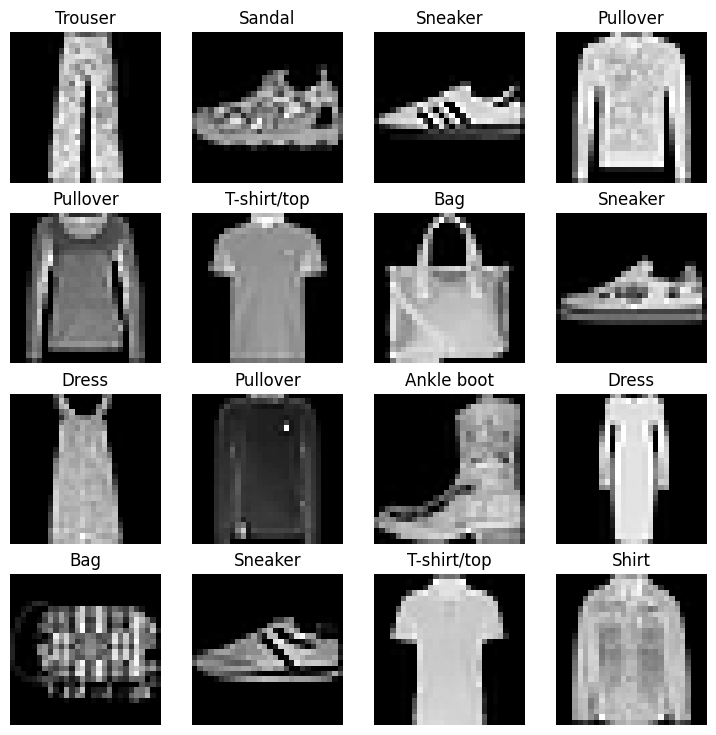

In [212]:
# Plot more images
torch.manual_seed(11)
fig = plt.figure(figsize = (9,9));
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_index = torch.randint(0, len(train_data),size = [1]).item()
    img, label = train_data[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False);

In [213]:
x = torch.randint(0, len(train_data),size = (2,2,1))
x

tensor([[[ 8768],
         [46605]],

        [[17068],
         [47581]]])

In [214]:
y = torch.randint(0, len(train_data),size = (1,))

In [215]:
y

tensor([53508])

In [216]:
y.item() # Convert to a list of numbers

53508

### 2. Prepare DataLoader

Till now, our data is in the form of PyTorch Datasets

In [217]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [218]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

`DataLoader turns our dataset into Python iterables.`

More specifically we want to turn our data into batches/mini-batches

WhYiee??
1. It is more computationally efficient, as in our computing hardware may not be able to look(store in memory) 60,000 images at one shot. So we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradients per epoch.

In [219]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

In [220]:
train_dataloader

In [221]:
len(train_data)/32

1875.0

In [222]:
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                             shuffle = False)

In [223]:
len(test_data)/32

312.5

In [224]:
test_dataloader

In [225]:
# Let's check what we have created
print(f"Dataloaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a25643da110>, <torch.utils.data.dataloader.DataLoader object at 0x7a2577c809d0>)
Length of train_dataloader : 1875 batches of 32
Length of test_dataloader : 313 batches of 32


In [226]:
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                             shuffle = False,
                             drop_last = True)

In [227]:
# Let's check what we have created
print(f"Dataloaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a25643da110>, <torch.utils.data.dataloader.DataLoader object at 0x7a2577c83640>)
Length of train_dataloader : 1875 batches of 32
Length of test_dataloader : 312 batches of 32


In [228]:
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                             shuffle = False)

In [229]:
# Let's check what we have created
print(f"Dataloaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a25643da110>, <torch.utils.data.dataloader.DataLoader object at 0x7a2577c833a0>)
Length of train_dataloader : 1875 batches of 32
Length of test_dataloader : 313 batches of 32


In [230]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


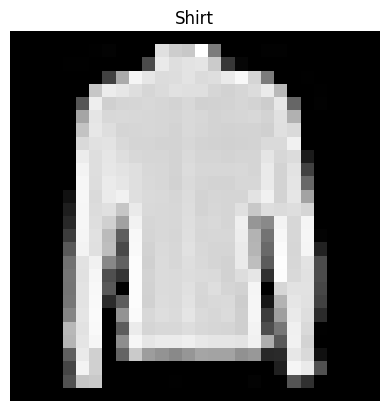

In [231]:
# Show a sample
# torch.manual_seed(42)
random_index = torch.randint(0, len(train_features_batch),size = [1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False);
print(f"Image size : {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### 3. Model 0: Build a baseline model



In [232]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [233]:
# Flattern the sample

output = flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [234]:
28*28

784

In [235]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.2549,
        0.2275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2941, 0.1451, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3412,
        0.3725, 0.4941, 0.4353, 0.1843, 0.0510, 0.0000, 0.0039, 0.0627, 0.2039,
        0.4549, 0.5020, 0.3529, 0.2627, 0.0039, 0.0000, 0.0039, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0235, 0.3490,
        0.4784, 0.3137, 0.4588, 0.5882, 0.5412, 0.5137, 0.5098, 0.5255, 0.5373,
        0.5843, 0.6431, 0.4235, 0.2510, 0.4353, 0.3255, 0.0000, 0.0000, 0.0039,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2510,
        0.3569, 0.3098, 0.2980, 0.2902, 0.5255, 0.5373, 0.5137, 0.5843, 0.6157,
        0.5882, 0.6000, 0.5569, 0.2353, 0.3255, 0.2980, 0.2902, 0.2196, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [236]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [237]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape = 28*28,
                              hidden_units = 10,
                              output_shape = len(class_names)).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [238]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x) # logits as output

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [239]:
model_0(dummy_x).shape

torch.Size([1, 10])

In [240]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

#### 3.1 Setup loss, optimizer and evaluation metrics

- Loss Function: Since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

- Optimizer: Our optimizer `torch.optim.SGD` (Stochastic Gradient Descent)

- Evaluation Metric: Since we're on classification problem, let's use accuracy as our evaluation metric.

In [241]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [242]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

#### 3.2 Creating a function to time our experiments

Two of the main things we often track are:
1. Model's performance (loss, accuracy values etc.)
2. How fast model runs

In [243]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device = None):
    '''Prints difference between start and end time.'''
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [244]:
start_time = timer()
# Some Code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


2.821100042638136e-05

#### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all

In [245]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [246]:
# Import tqdm -> for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_CPU = timer()

# Set the number of epochs (We'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n")

    # TRAINING
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward
        y_pred = model_0(X)

        # 2. Calculate Loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss

        # 3. Optimizer Zero Grad
        optimizer.zero_grad()

        # 4. Backward loss
        loss.backward()

        # 5. Optimizer Step
        optimizer.step()

        # Print out what's going on
        if batch%400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by the length of train_dataloader to get loss per epoch
    train_loss = train_loss/len(train_dataloader)

    # TESTING...
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:  # X is image and y is label
            # 1. Forward
            test_pred = model_0(X_test)

            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate the accuracy
            test_acc += accuracy_fn(y_true = y_test,
                                    y_pred = test_pred.argmax(dim=1))
        # Calculate the test loss avg. per batch
        test_loss = test_loss/len(test_dataloader)

        # Calculate the test_acc avg. per batch
        test_acc/=len(test_dataloader)

        # Print out what's happening
        print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_CPU,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch:1

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch:2

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 27.706 seconds


In [247]:
next(model_0.parameters()).device

device(type='cpu')

In [248]:
str(next(model_0.parameters()).device)

'cpu'

### 4. Make predictions and get model_0 results

In [249]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [250]:
device

'cuda'

In [251]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
    ''' Returns a dictionary containing the results of model predicting on data_loader.'''
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # Make our data device agnostic
            X,y = X.to(device),y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1)) # We can also use softmax here

        # Scale loss and acc. to find the avg. loss/acc per batch
        loss/=len(data_loader)
        acc/=len(data_loader)

    return {"model_name":model.__class__.__name__, # only works when model was created with Class
            "model_loss":loss.item(),
            "model_acc":acc}

In [252]:
# Calculate model_0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = "cpu"
                             )
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. Setup device-agnostic code (for using a GPU if there is one)

In [253]:
!nvidia-smi

Fri Dec 27 18:43:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0              32W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [254]:
torch.cuda.is_available()

True

In [255]:
device

'cuda'

### 6. Creating model with non-linearity

In [256]:
# Let's write a non-linear model

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_shape),
            nn.ReLU()
        )

    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)

In [257]:
next(model_0.parameters()).device

device(type='cpu')

In [258]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, # 28*28
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [259]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [260]:
str(next(model_1.parameters()).device)

'cuda:0'

#### 6.1 Setup loss, optimizer and evaluation metrics

In [261]:
# Loss function and Optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

#### 6.2 Functioning training and testing loop

Let's create a function for:
- training loop - `train_step()`
- testing loop - `test_step()`

In [262]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0,0

    # Put model into the training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):

        # Put data on the target device
        X,y = X.to(device), y.to(device)

        # 1. Forward
        y_pred = model(X)

        # 2. Calculate Loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1)) # go from logits to prediction labels

        # 3. Optimizer Zero Grad
        optimizer.zero_grad()

        # 4. Backward loss
        loss.backward()

        # 5. Optimizer Step
        optimizer.step()

    # Divide total train loss and acc by the length of train_dataloader to get loss per epoch
    train_loss = train_loss/len(data_loader)
    train_acc = train_acc/len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

In [263]:
def test_step(model: torch.nn.Module,
               test_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:  # X is image and y is label

            # Send the data to the target device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward
            test_pred = model(X_test)

            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate the accuracy
            test_acc += accuracy_fn(y_true = y_test,
                                    y_pred = test_pred.argmax(dim=1))
        # Calculate the test loss avg. per batch
        test_loss = test_loss/len(test_dataloader)

        # Calculate the test_acc avg. per batch
        test_acc/=len(test_dataloader)

        # Print out what's happening
        print(f"\nTest loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [264]:
# Import tqdm -> for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the number of epochs (We'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n")

    train_step(model = model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

    test_step(model = model_1,
              test_dataloader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu ,end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0

Train loss: 1.09199 | Train Accuracy: 61.34%

Test loss: 0.95636 | Test acc: 65.00%

Epoch:1

Train loss: 0.78101 | Train Accuracy: 71.93%

Test loss: 0.72227 | Test acc: 73.91%

Epoch:2

Train loss: 0.67027 | Train Accuracy: 75.94%

Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 31.158 seconds


In [265]:
total_train_time_model_0

27.705920878999677

**NOTE:**  
Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

> Why?

> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

Making Deep Learning Go Brrrr From First Principles:

https://horace.io/brrr_intro.html

In [266]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [267]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

### Model 2: Building a CNN

CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data

**CNN Explainer:** https://poloclub.github.io/cnn-explainer/

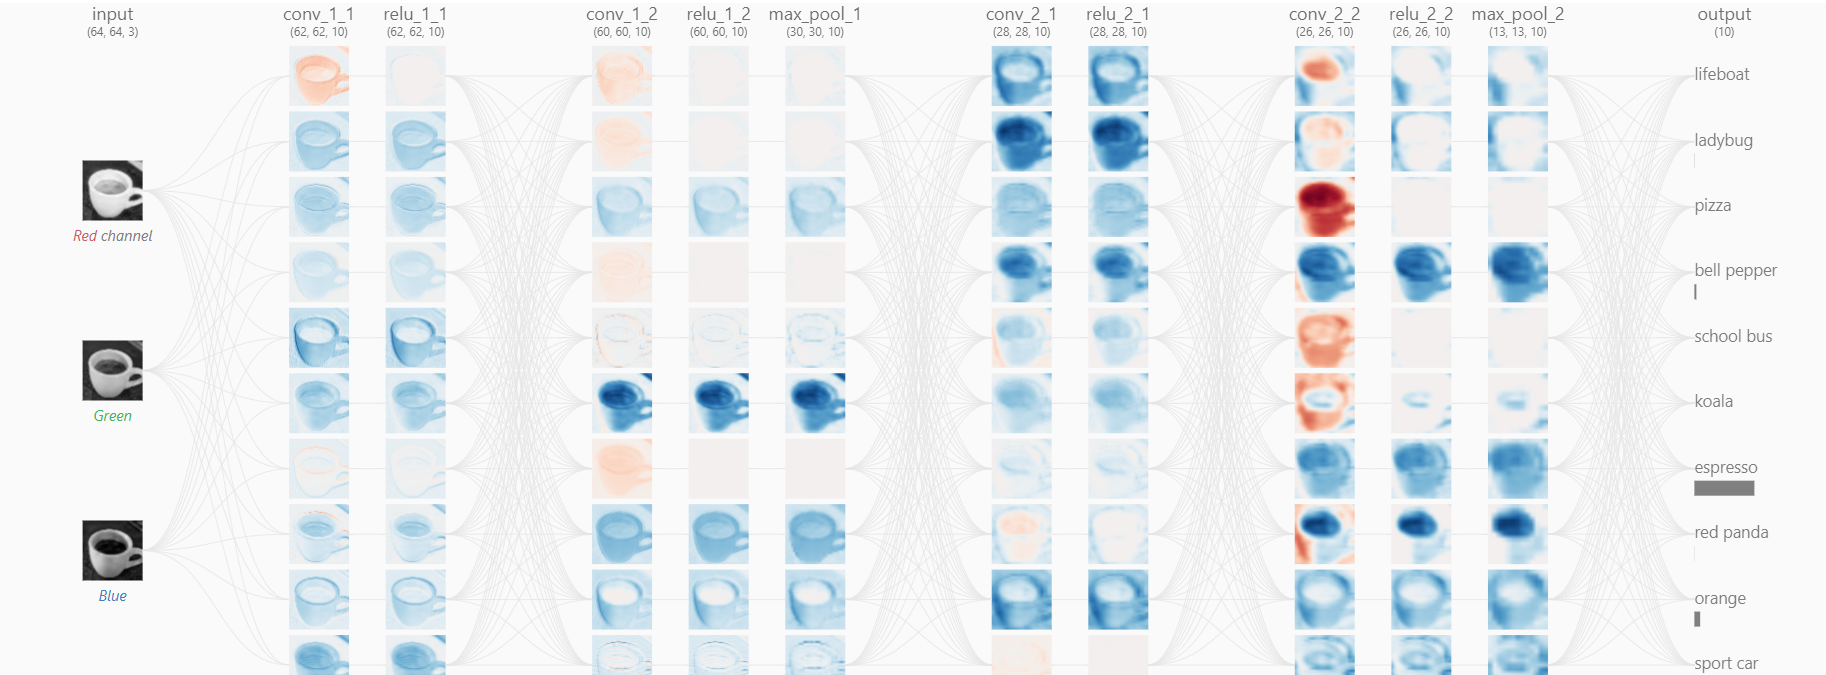

In [476]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
    '''
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    '''
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(

            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = (3,3), # 3*3 is the size of the window
                      stride = 1,
                      padding = 1), # values we can set ourselves in ourselves NN are called hyperparameters

            nn.ReLU(),

            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = (3,3),
                      stride = 1,
                      padding = 1),

            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2,2))
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = (3,3),
                      stride = 1,
                      padding = 1),

            nn.ReLU(),

            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = (3,3),
                      stride = 1,
                      padding = 1),

            nn.ReLU(),

            nn.MaxPool2d(kernel_size = (2,2))
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features = hidden_units*7*7,  # there is a trick to calculate this!!, for time being write it hidden_units
                out_features = output_shape
            )
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}") : Use these print statements to find the hidden_units*??
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [456]:
image.shape

torch.Size([1, 28, 28])

In [457]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

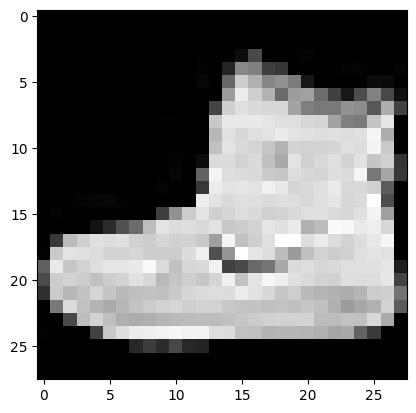

In [458]:
plt.imshow(image.squeeze(),cmap="gray");

### TRICK!! 🔮

In [459]:
rand_image_tensor = torch.randn(size = (1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [460]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

**See the matrix error and fix it out with writting the suitable shape hidden_units*___ in the fill the blanks above code**

In [461]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

#### 7.1. Stepping through `nn.Conv2d()`

In [462]:
# Let's create some dummy data
torch.manual_seed(42)

images = torch.randn(size = (32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [463]:
test_image.shape

torch.Size([3, 64, 64])

In [464]:
# Create a single conv2d layer
torch.manual_seed(11)
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3, # equivalent to (3,3)
                       stride = 1,
                       padding = 0)

conv_layer

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))

In [465]:
# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-1.2966,  0.5491, -0.1111,  ...,  1.2671, -0.6781, -0.4319],
         [-0.5096, -1.1356,  0.2408,  ..., -0.7413, -0.6663, -0.3668],
         [-1.9349,  0.6503, -0.8507,  ..., -0.3085, -0.3088,  0.2056],
         ...,
         [-0.3045, -0.5038, -0.1544,  ..., -0.1524,  0.1223,  0.0122],
         [ 0.1124,  0.9064, -0.8673,  ..., -0.0794, -0.2179,  0.3349],
         [-0.2451,  0.4459,  0.3064,  ...,  0.2325, -0.3385,  0.6214]],

        [[-0.5047, -0.2479,  0.7584,  ...,  0.6061, -0.9474,  0.4349],
         [-0.7825,  0.8742, -0.6974,  ...,  0.2036, -0.0845, -0.2510],
         [ 0.9921, -0.1555,  0.3871,  ...,  0.1355, -0.2610, -0.2316],
         ...,
         [-0.5649,  0.4988, -0.0488,  ...,  0.2384,  0.1582,  0.0651],
         [-0.4880, -0.5798, -1.1813,  ...,  0.5659, -0.1678,  0.0118],
         [ 0.0437,  0.2761, -0.1585,  ...,  0.6487, -1.0355, -0.4814]],

        [[ 1.3074,  0.8621, -0.1641,  ..., -0.5820,  0.0418, -0.8905],
         [-1.1229, -0.7303,  1.1678,  ...,  0

In [466]:
test_image.shape

torch.Size([3, 64, 64])

In [467]:
conv_output.shape # try to observe the conv_output shape by changing the kernel_size and other parameters

torch.Size([10, 62, 62])

#### 7.2 Stepping through `nn.MaxPool2d()`

In [468]:
test_image.shape

torch.Size([3, 64, 64])

In [469]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


In [470]:
# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 4)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer: {test_image_through_conv.shape}")

# Pass the data through the max pool layer
test_image_through_convandmaxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer and max_pool_layer: {test_image_through_convandmaxpool.shape}")

Shape after going through conv_layer: torch.Size([10, 62, 62])
Shape after going through conv_layer and max_pool_layer: torch.Size([10, 15, 15])


In [471]:
62//4

15

In [472]:
torch.manual_seed(42)
# Create a random tensor with a similar no. of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor:\n {random_tensor}")
print(f"\nRandom tensor shape: {random_tensor.shape}")

# Create a max_pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor: {max_pool_tensor}")
print(f"\nMax pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: tensor([[[[0.3367]]]])

Max pool tensor shape: torch.Size([1, 1, 1, 1])


#### 7.3 Setup a loss function and optimizer for `model_2`

In [473]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

In [474]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

#### 7.4 Training and Testing `model_2` using our training and test functions

In [475]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_timer_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_step(model = model_2,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

    test_step(model = model_2,
              test_dataloader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)
train_timer_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_timer_start_model_2 ,end = train_timer_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 0.59275 | Train Accuracy: 78.54%

Test loss: 0.40606 | Test acc: 85.30%

Epoch: 1

Train loss: 0.36126 | Train Accuracy: 87.02%

Test loss: 0.35738 | Test acc: 86.91%

Epoch: 2

Train loss: 0.32491 | Train Accuracy: 88.23%

Test loss: 0.32502 | Test acc: 87.85%

Train time on cuda: 38.274 seconds


In [477]:
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32502198219299316,
 'model_acc': 87.84944089456869}

In [478]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 8. Compare model results and training time

In [479]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325022,87.849441


In [482]:
# Add training time to results comparison

compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.705921
1,FashionMNISTModelV1,0.685001,75.019968,31.157502
2,FashionMNISTModelV2,0.325022,87.849441,38.274275


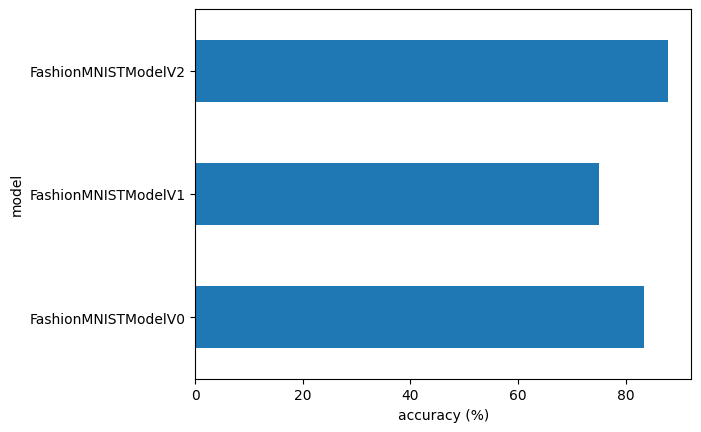

In [481]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### 9. Make and evaluate random predictions with the best model

In [483]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Add a batch dimension and pass to target device
            sample = torch.unsqueeze(sample, dim = 0).to(device)

            # Forward pass
            pred_logit = model(sample)

            # Get the prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [484]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [486]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [487]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [488]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.7304e-08, 1.8554e-09, 3.3303e-09, 6.0557e-08, 6.4750e-10, 9.9995e-01,
         4.9189e-08, 1.7526e-06, 5.5269e-06, 4.4076e-05],
        [6.2961e-02, 4.6331e-01, 4.0136e-03, 2.4443e-01, 9.9968e-02, 1.1330e-04,
         1.2455e-01, 1.8534e-04, 1.6538e-04, 3.0379e-04]])

In [489]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [490]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [491]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

**Visualize!!**

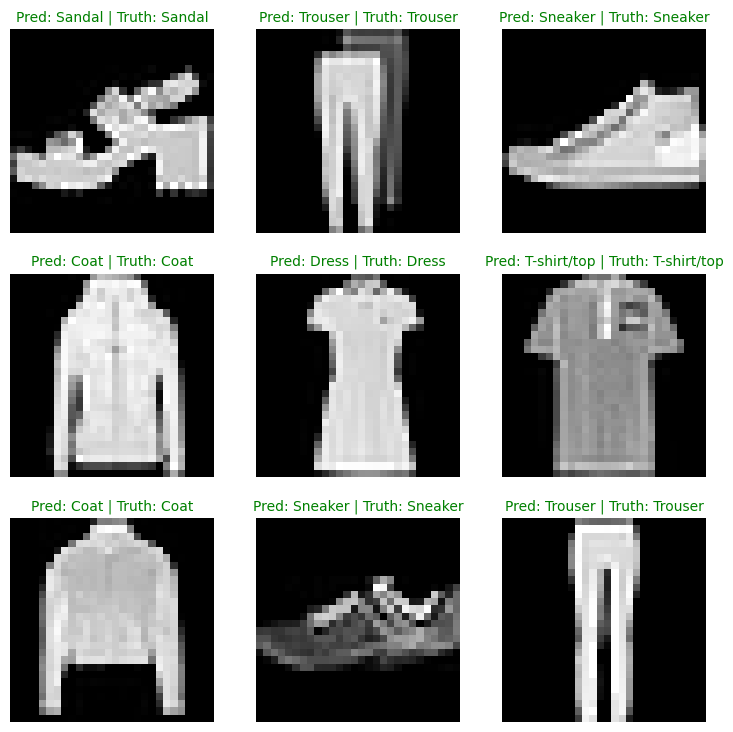

In [492]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

### 10. Making a confusion matrix for further prediction evaluation

In [493]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [494]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 23.7 MB/s eta 0:00:00
mlxtend version: 0.23.3


In [495]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.3


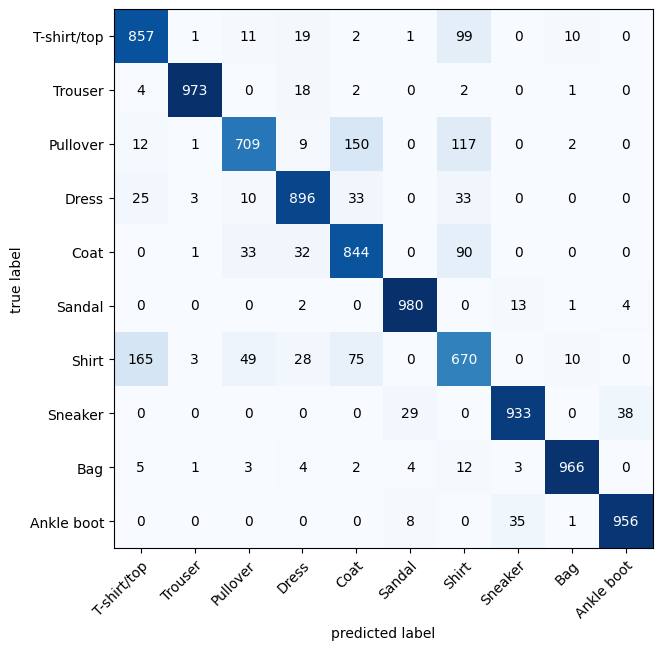

In [496]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

### 11. Save and load best performing model

In [498]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "Computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/Computer_vision_model_2.pth


In [499]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

<ipython-input-499-01e1a5266d0e>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [500]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32502198219299316,
 'model_acc': 87.84944089456869}

In [501]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32502198219299316,
 'model_acc': 87.84944089456869}

In [502]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)